## Trabalho final de Inteligencia Artificial 

Aluno: Marcelo Nascimento da Silva

O código abaixo implementa o K-means clustering que serve para agrupar dados em clusters com base em suas características. A base de dados usadas Spotify Dataset. 

Acesso em: https://research.atspotify.com/datasets/

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px 
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from yellowbrick.target import FeatureCorrelation

import warnings
warnings.filterwarnings("ignore")

- Carregamento dos dados

In [2]:
dados = pd.read_csv("../data/data.csv")
dados_genero = pd.read_csv('../data/data_by_genres.csv')
dados_ano = pd.read_csv('../data/data_by_year.csv')

In [3]:
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [4]:
print(dados_genero.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB
None


In [5]:
print(dados_ano.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB
None


In [6]:
dados.columns.tolist()

['valence',
 'year',
 'acousticness',
 'artists',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'id',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'name',
 'popularity',
 'release_date',
 'speechiness',
 'tempo']

- Análise de correlação 

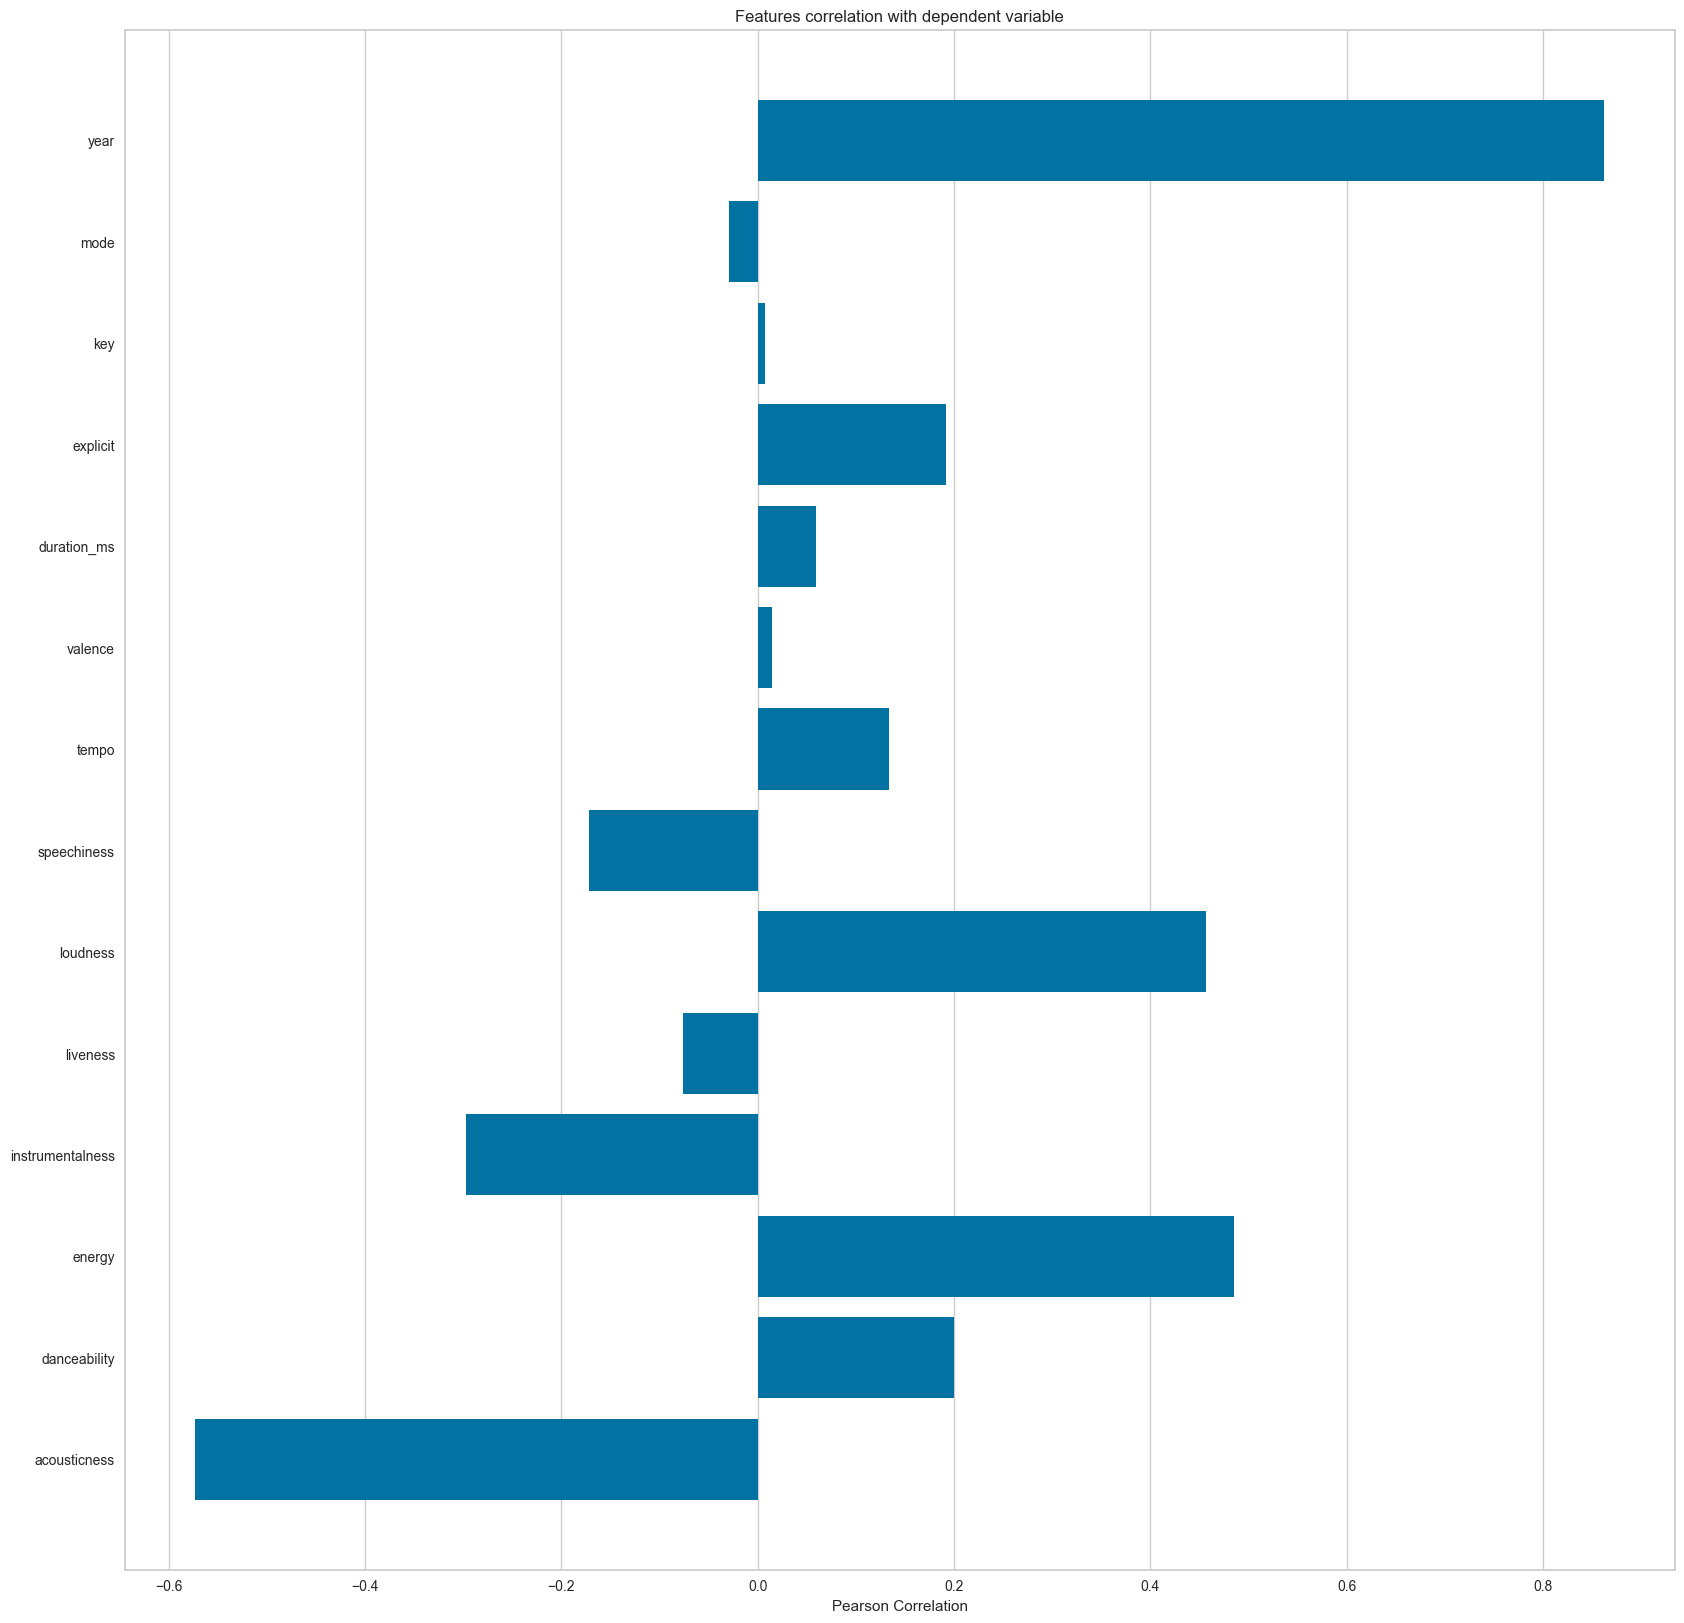

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [7]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = dados[feature_names], dados['popularity']

# lista de nomes das features carregadas para um array
features = np.array(feature_names)

visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)    
visualizer.show()

In [8]:
# lista com características sonoras
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']

fig = px.line(dados_ano, x='year', y=sound_features)
fig.show()

In [9]:
# pega o top 10 generos por popularidade 
top10_genres = dados_genero.nlargest(10, 'popularity')

fig = px.bar(top10_genres, x='genres', y=['energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

In [10]:
# função para carregar o csv
def load_dataset(file_path):
    return pd.read_csv(file_path)

# função da distancia euclidiana 
def euclidean(a, b):
    return np.linalg.norm(a - b) # funcao para encontrar a norma vectorial e matricial 

# K-means clustering 

In [11]:
def kmeans(k, epsilon=0, distance='euclidean'):
    # lista para armazenar os centróides
    historico_centroides = []
    
    # cálculo de distância
    if distance == 'euclidean':
        metodo_distancia = euclidean
    
    dataset = load_dataset(r'C:\Users\nasci\Desktop\Trabalho Final - IA 24.1\data\data.csv')
    
    # variavel que armazena características relevantes para a clusterização 
    caracteristicas = dataset[['valence', 'danceability']].values # ajustar conforme necessário
    
    # recebe o número de instâncias e características
    num_instancias, num_caracteristicas = caracteristicas.shape
    
    # define k centróides escolhidos aleatoriamente do conjunto de dados
    prototipos = caracteristicas[np.random.randint(0, num_instancias - 1, size=k)]
    historico_centroides.append(prototipos.copy())
    
    # acompanha a mudança dos centróides
    prototipos_antigos = np.zeros(prototipos.shape)
    
    # array para armazenar as atribuições de cluster
    pertencimento = np.zeros((num_instancias, 1))
    
    norma = metodo_distancia(prototipos, prototipos_antigos)
    
    iteracao = 0

    # parte principal do algoritmo, loop que calcula e atribui cluster pelo centroide 
    while norma > epsilon:
        iteracao += 1
        norma = metodo_distancia(prototipos, prototipos_antigos)
        
        # atualiza os centróides
        for idx_instancia, instancia in enumerate(caracteristicas):
            # recalcula a distância da instância para cada centróide
            vetor_dist = np.zeros((k, 1))
            for idx_prototipo, prototipo in enumerate(prototipos):
                vetor_dist[idx_prototipo] = metodo_distancia(prototipo, instancia)
            
            # determina a instância ao centróide mais próximo
            pertencimento[idx_instancia] = np.argmin(vetor_dist)
        
        # atualiza os centróides
        tmp_prototipos = np.zeros((k, num_caracteristicas))
        for idx in range(len(prototipos)):
            # encontra instâncias próximas ao centróide atual
            instancias_proximas = [i for i in range(len(pertencimento)) if pertencimento[i] == idx]
            # verificar se há instâncias próximas atribuídas ao centróide
            if len(instancias_proximas) > 0:
                # calcula novo centróide como a média das características das instâncias próximas
                prototipo = np.mean(caracteristicas[instancias_proximas], axis=0)
                # atualizar temporariamente os centróides
                tmp_prototipos[idx, :] = prototipo
        
        # buscar mudanças nos centroids
        prototipos_antigos = prototipos.copy()
        prototipos = tmp_prototipos.copy()
        
        # adiciona os centróides ao histórico
        historico_centroides.append(prototipos.copy())

    # atribui o cluster de cada instância ao conjunto de dados original
    dataset['cluster'] = pertencimento.astype(int)
    # retorna os centróides finais, histórico de centróides e atribuições de cluster
    return prototipos, historico_centroides, pertencimento.astype(int)

In [12]:
# função para plotar clusters e histórico dos centróides
def plot(dataset, historico_centroides, pertencimento):
    cores = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    fig, ax = plt.subplots()
    
    for idx in range(dataset.shape[0]):
        idx_cluster = int(pertencimento[idx]) # recebendo o cluster ao qual o ponto pertence
        ax.plot(dataset.iloc[idx]['valence'], dataset.iloc[idx]['danceability'], cores[idx_cluster] + 'o')
    
    for idx, centroides in enumerate(historico_centroides):
        # adicionando o centróide inicial (azul) e os subsequentes (vermelhos)
        for inner, item in enumerate(centroides):
            if idx == 0:
                ax.plot(item[0], item[1], 'bo') # azul para o centróide inicial
            else:
                ax.plot(item[0], item[1], 'ro')
    
    plt.show()

- O método Elbow Method é uma das formas usadas para descobrir a quantidade ideal de clusters em um conjunto de dados. 

  File "C:\Users\nasci\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


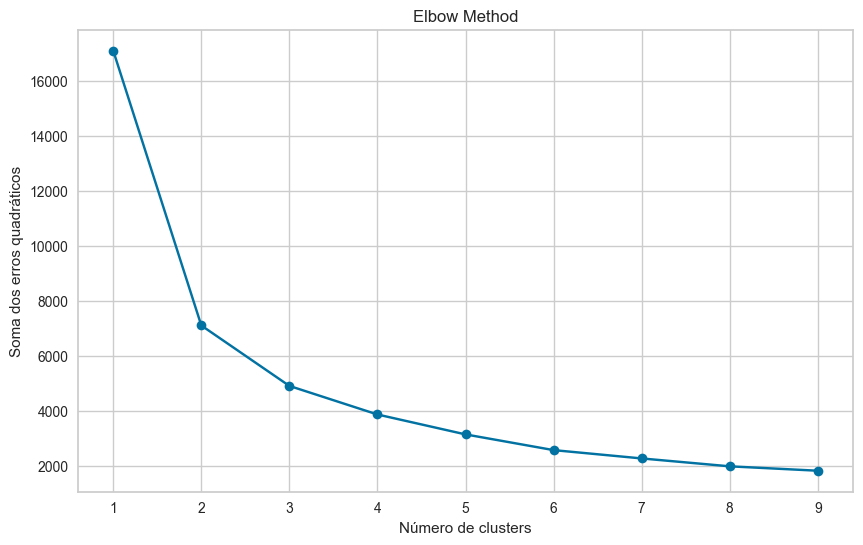

In [13]:
# função para o método do cotovelo
def elbow_method():
    dataset = load_dataset(r'C:\Users\nasci\Desktop\Trabalho Final - IA 24.1\data\data.csv')

    # selecionando as colunas relevantes para clustering
    X = dataset[['valence', 'danceability']].values

    sse = []

    # ajustar o modelo K-means com diferentes números de clusters
    for i in range(1, 10):
        kmeans = KMeans(n_clusters=i, max_iter=300)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 10), sse, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Número de clusters')
    plt.ylabel('Soma dos erros quadráticos')
    plt.show()

elbow_method()


- Depois de executar o código do algoritmo do Elbow Method e olhando para os dados que estamos apresentando como exemplo, um bom número de K para ele é o número 4.

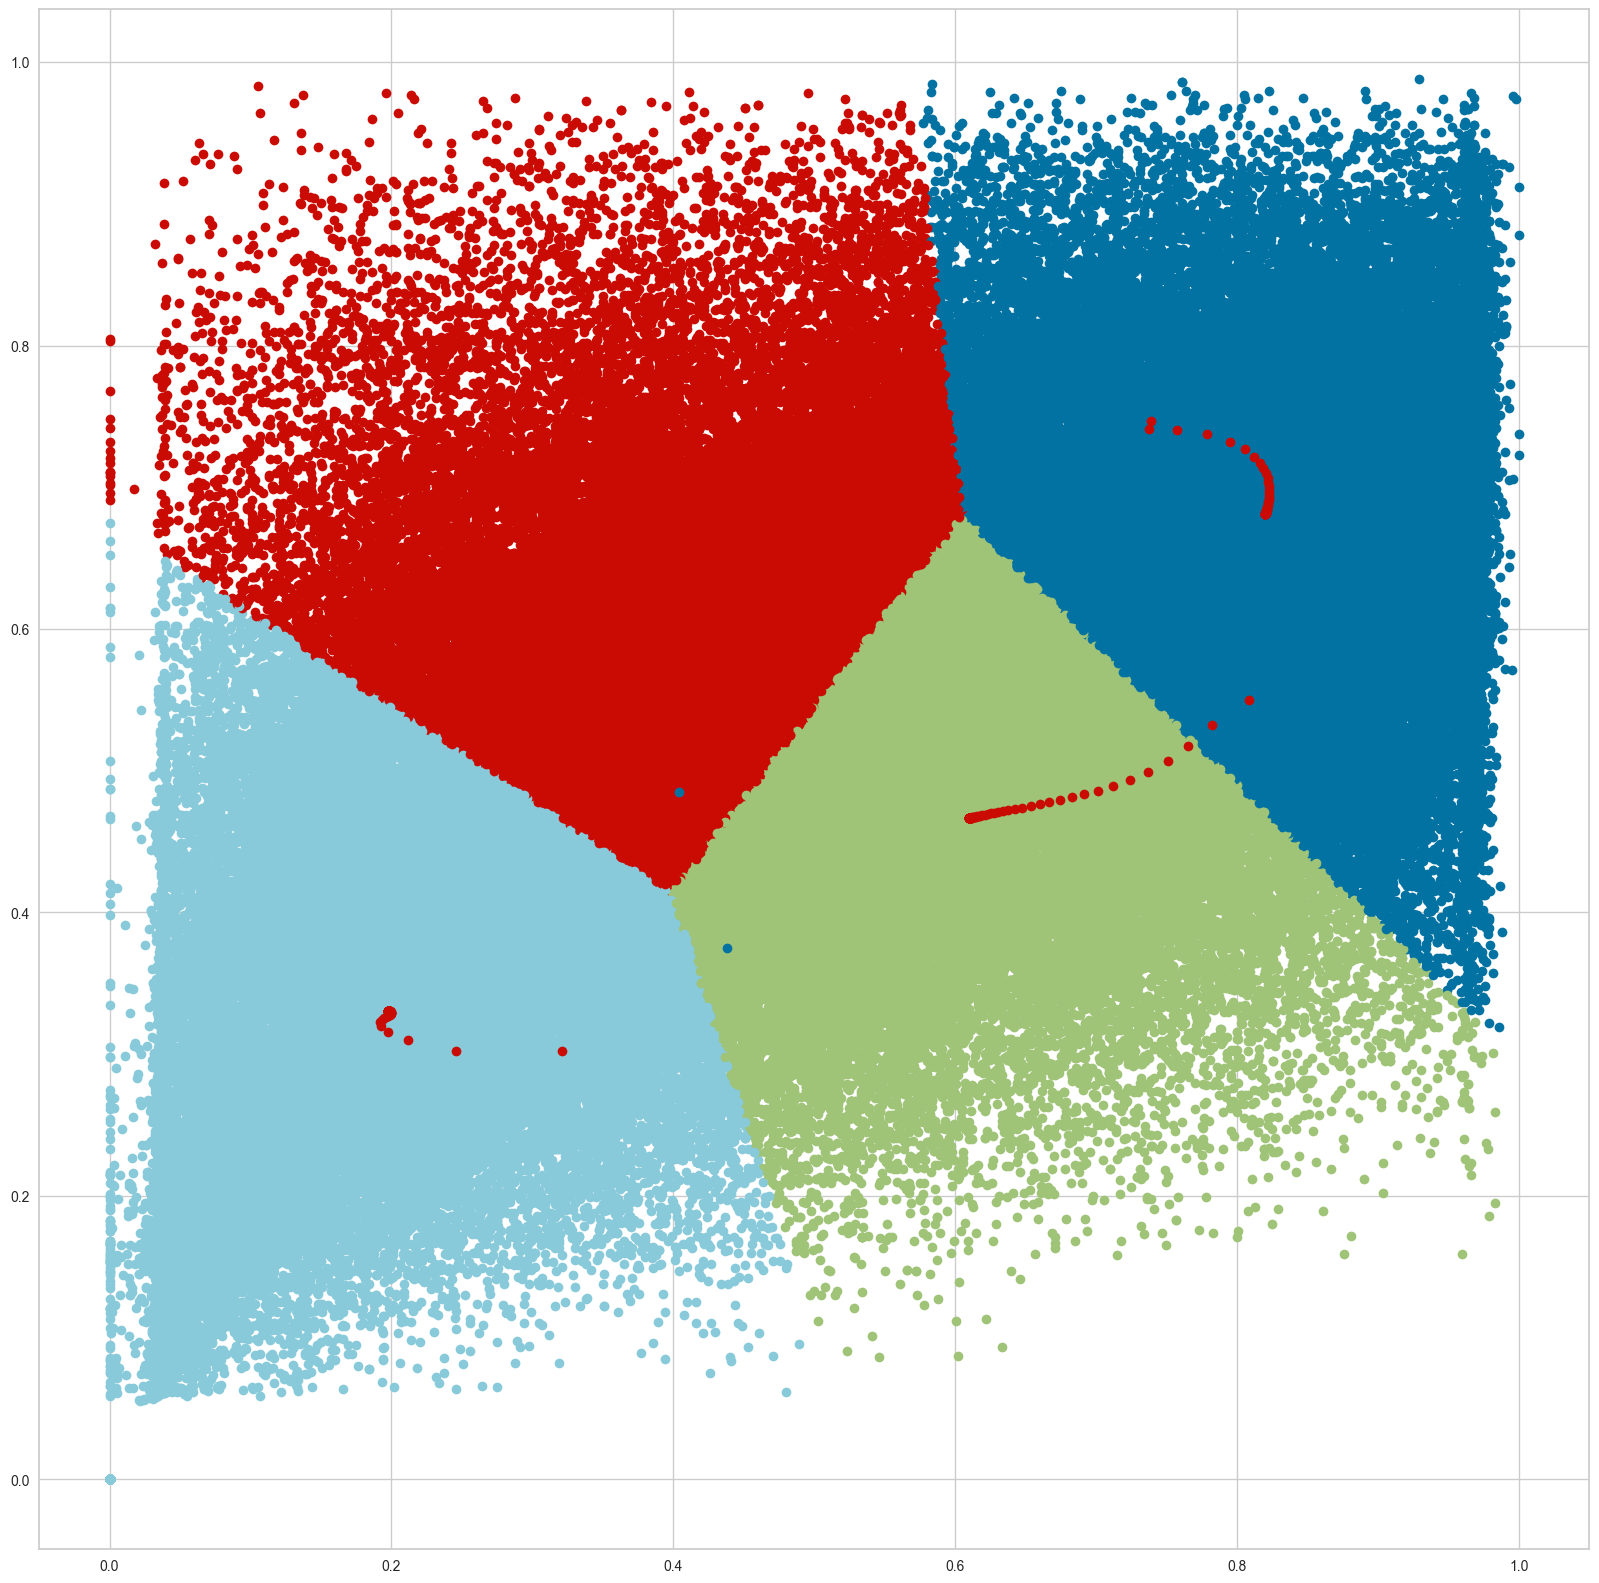

In [14]:
def execute():
    dataset = load_dataset(r'C:\Users\nasci\Desktop\Trabalho Final - IA 24.1\data\data.csv')
    centroides, historico_centroides, pertencimento = kmeans(4)  # ajustar k conforme desejar 
    plot(dataset, historico_centroides, pertencimento)

execute()

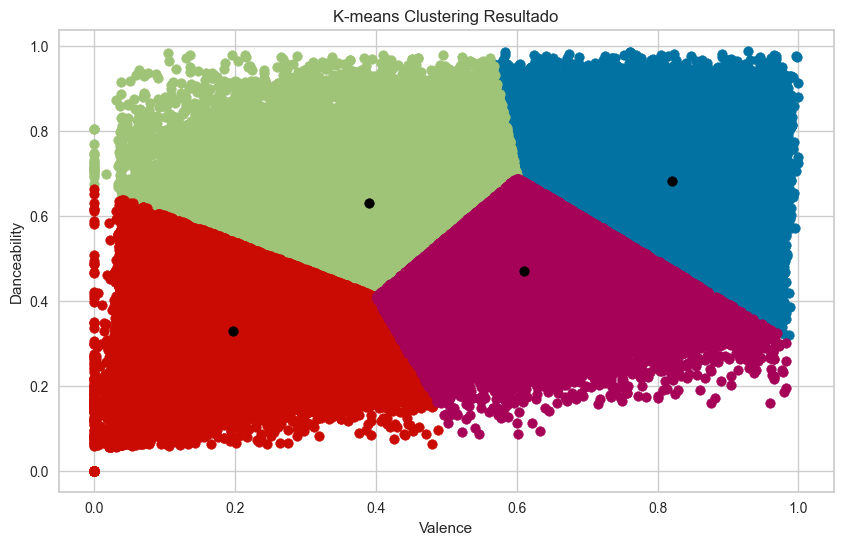

In [23]:
# resultado com a função pronta de kmeans
def plot_kmeans_results():
    dataset = load_dataset(r'C:\Users\nasci\Desktop\Trabalho Final - IA 24.1\data\data.csv')
    X = dataset[['valence', 'danceability']].values

    # configurando o modelo K-means com 4 clusters
    kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clusters = kmeans.fit_predict(X)

    plt.figure(figsize=(10, 6))
    # pontos de dados de cada cluster separadamente
    plt.scatter(X[clusters == 0, 0], X[clusters == 0, 1], label='Cluster 0')
    plt.scatter(X[clusters == 1, 0], X[clusters == 1, 1], label='Cluster 1')
    plt.scatter(X[clusters == 2, 0], X[clusters == 2, 1], label='Cluster 2')
    plt.scatter(X[clusters == 3, 0], X[clusters == 3, 1], label='Cluster 3')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="black")
    plt.title('K-means Clustering Resultado')
    plt.xlabel('Valence')
    plt.ylabel('Danceability')
    plt.show()

plot_kmeans_results()

- Função para buscar recomendações de músicas a partir do mesmo Cluster

In [34]:
# inserir nome da música 
song_name = 'Look What You Made Me Do'  # exemplo de música


In [35]:
def get_kmeans_recommendations(song_name, data, top_n=10):
    # encontra o cluster da música para pegar as recomendações
    song_data = data.loc[data['name'] == song_name]
    
    if song_data.empty:
        print(f"Música '{song_name}' não encontrada.")
        return []
    
    song_cluster = int(song_data['cluster'].values[0])
    
    # pega as músicas do mesmo cluster
    cluster_songs = data[data['cluster'] == song_cluster]
    cluster_songs = cluster_songs[cluster_songs['name'] != song_name]
    
    # pega recomendações atraves do cluster
    recommendations = cluster_songs.head(top_n)
    
    return recommendations['name'].tolist()

# exemplo de uso
prototipos_finais, historico_centroides, data_with_clusters = kmeans(k=4)
recommended_songs = get_kmeans_recommendations(song_name, data_with_clusters, top_n=10)
print(recommended_songs)

['Gati Mardika', 'The Wearing of the Green', 'Flor Marchita - Remasterizado', 'Bir Zamanlar Bizde Millet', 'Ey Bülbül-i Ter Zebân-i İrf', 'Yâ Râb Bu Uğursuz Gecenin Yok mu Sabahı -', 'Mis Harapos - Remasterizado', 'Tedhak Saking', 'Sri Kondur', 'IV. Finale. Adagio - Allegro molto e vivace']
